In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Définition du répertoire de sortie
output_dir = "1-graphs_tendances_achats/"
os.makedirs(output_dir, exist_ok=True)

# Charger les données
df_achats = pd.read_parquet("../../donnees/analyse_achat.parquet", engine="pyarrow")

# 📂 affihcer les données
print("df_achats.columns : ")
print(df_achats.columns)

df_achats.columns : 
Index(['order_id', 'order_item_id', 'product_id', 'seller_id', 'price',
       'freight_value', 'shipping_limit', 'limit', 'name_lenght',
       'description_lenght', 'photos_qty', 'weight_g', 'length_cm',
       'height_cm', 'width_cm', 'category_name', 'customer_id',
       'purchase_timestamp', 'approved_at', 'delivered_carrier',
       'delivered_customer', 'estimated_delivery', 'status', 'annee', 'mois',
       'annee_mois', 'jour', 'annee_jour', 'jour_semaine', 'trimestre',
       'annee_trimestre', 'semaine', 'annee_semaine', 'heure', 'approuvee',
       'envoyee', 'livree', 'estimee', 'customer_unique_id', 'cust_zip_code',
       'cust_city', 'cust_state', 'cust_name_state', 'cust_lat', 'cust_lng',
       'sell_zip_code', 'sell_city', 'sell_state', 'sell_name_state',
       'sell_lat', 'sell_lng'],
      dtype='object')


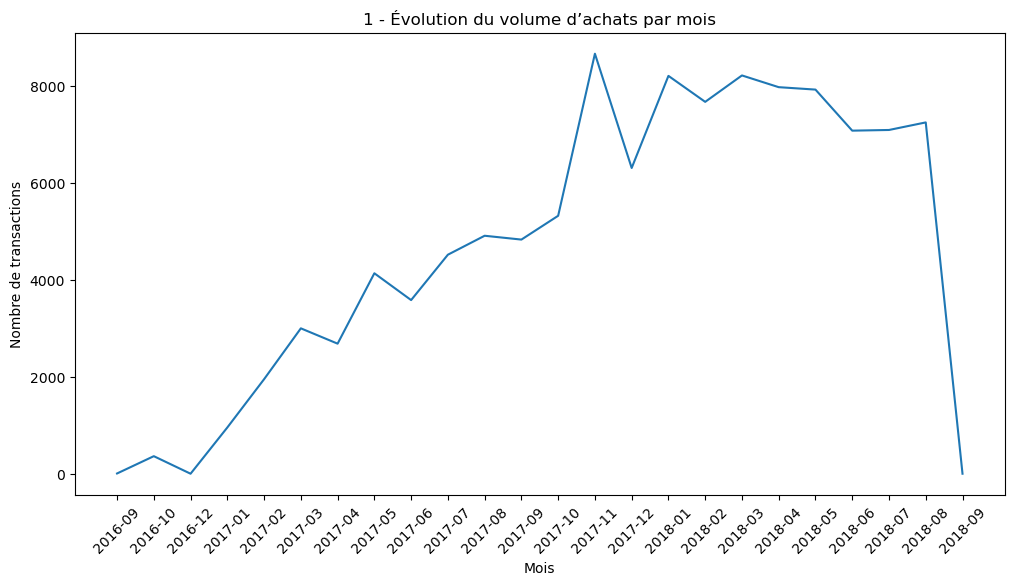

C:\Users\yasse\AppData\Local\Temp\ipykernel_29676\3769561139.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cust_state', y='order_id', data=df_regions, palette='coolwarm')


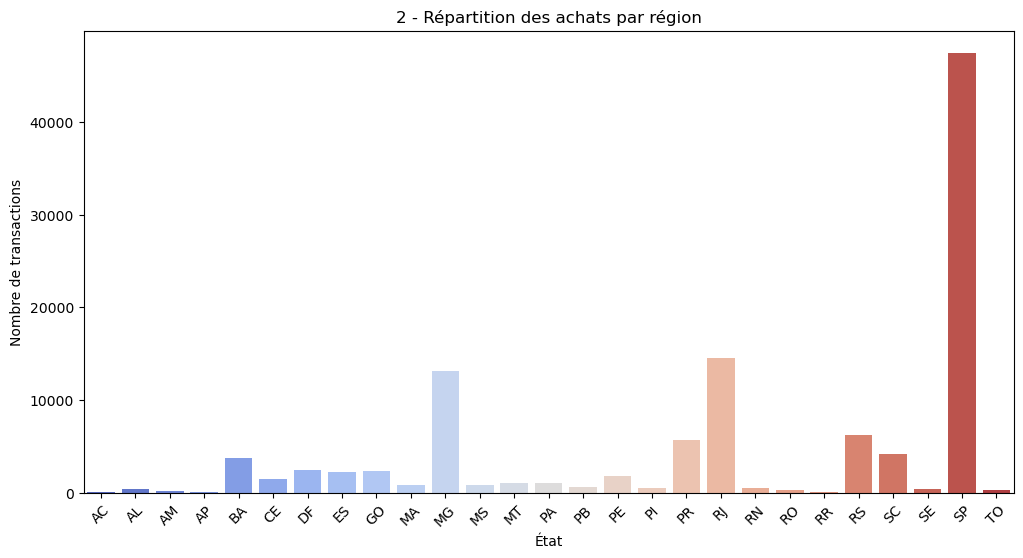

C:\Users\yasse\AppData\Local\Temp\ipykernel_29676\3769561139.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cust_state', y='price', data=df_achats, palette='coolwarm')


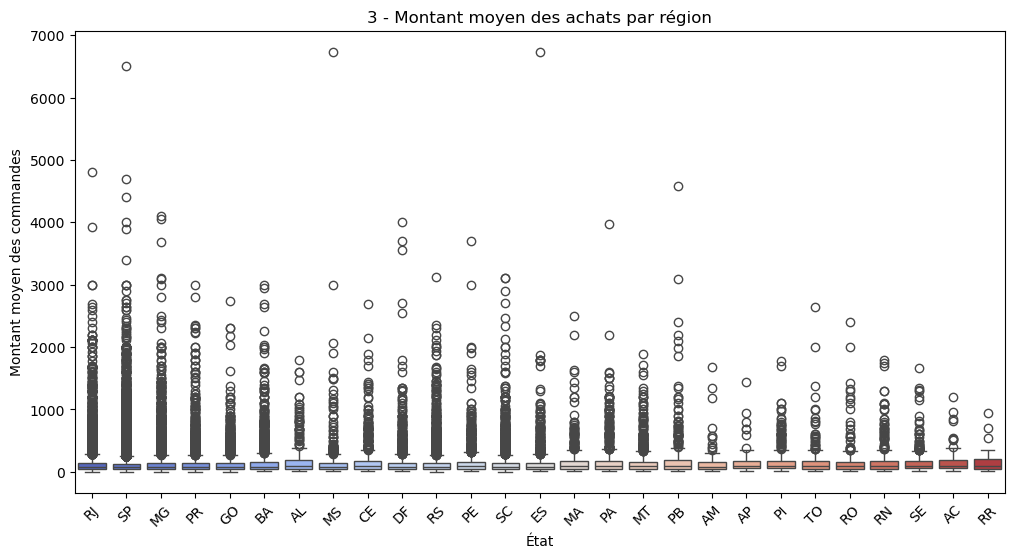

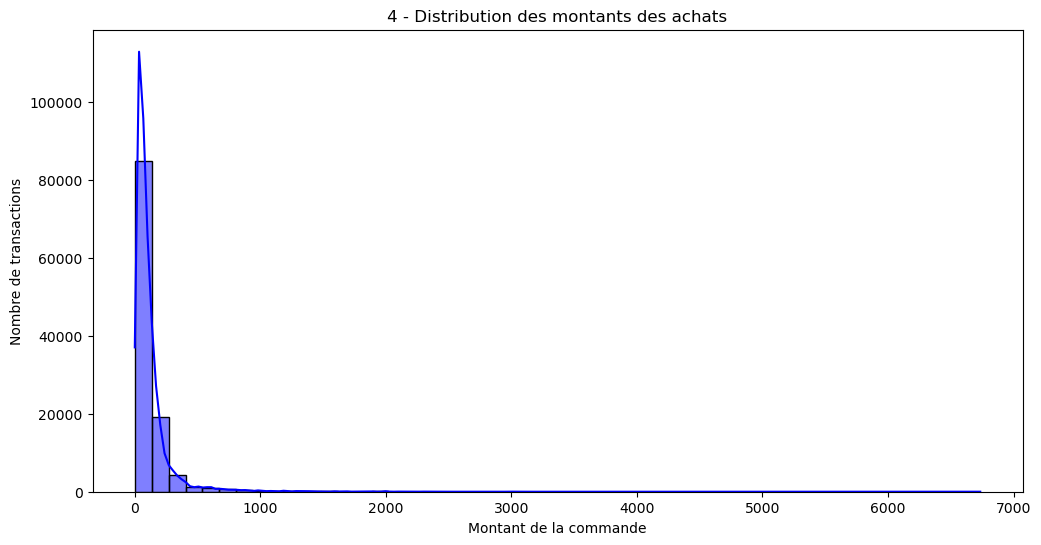

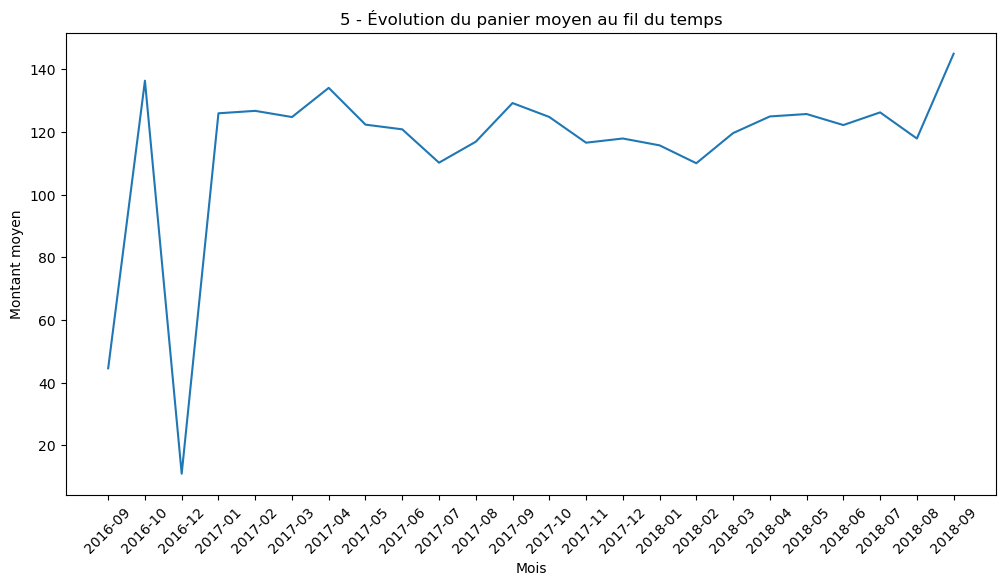

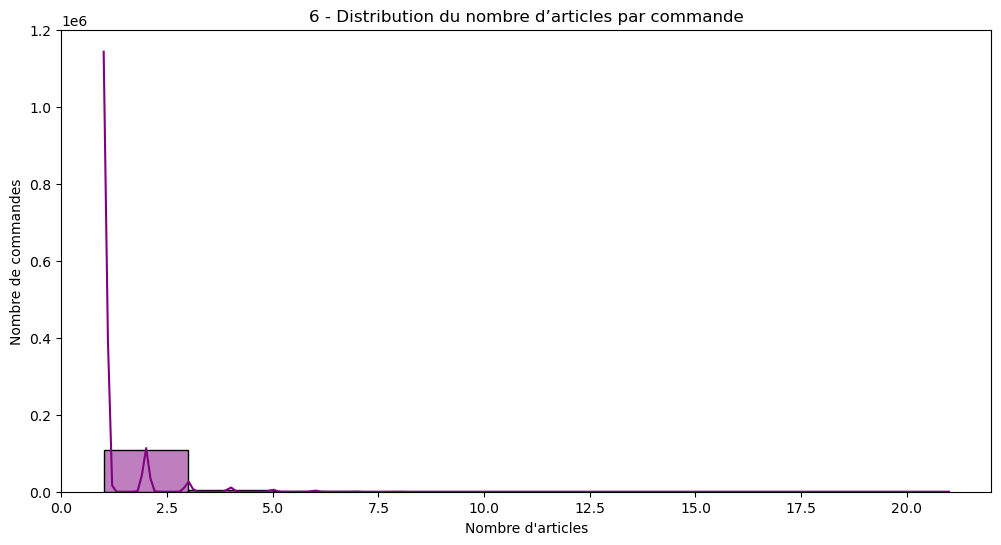

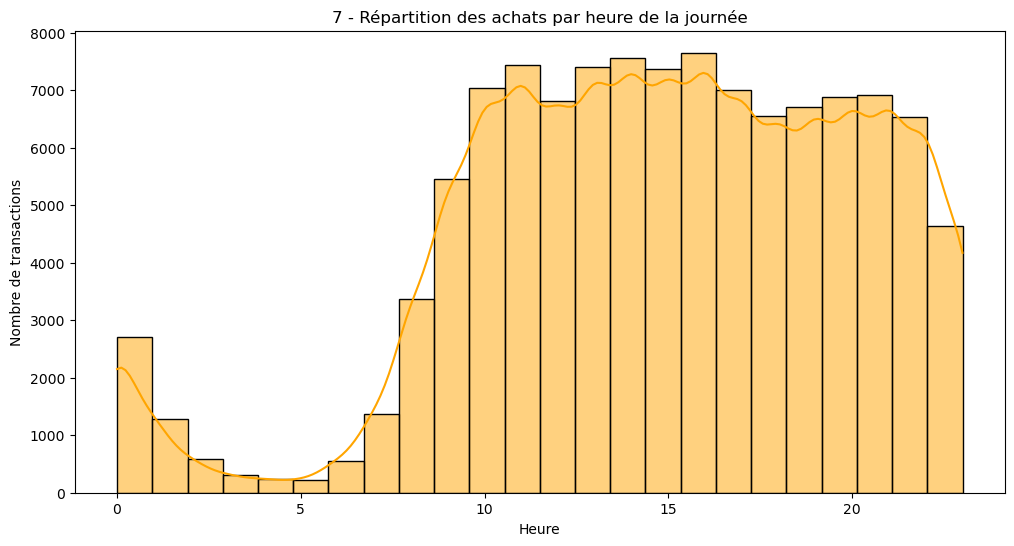

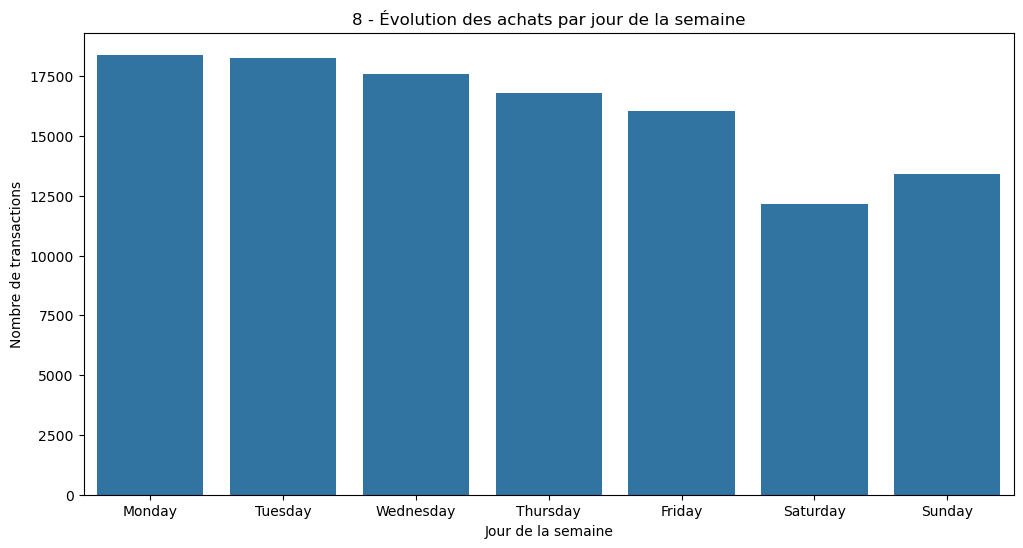

C:\Users\yasse\AppData\Local\Temp\ipykernel_29676\3769561139.py:91: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_early_late = df_achats.groupby(pd.cut(df_achats['jour_mois'], bins=[1,10,20,31], labels=["Début", "Milieu", "Fin"]))['order_id'].count()


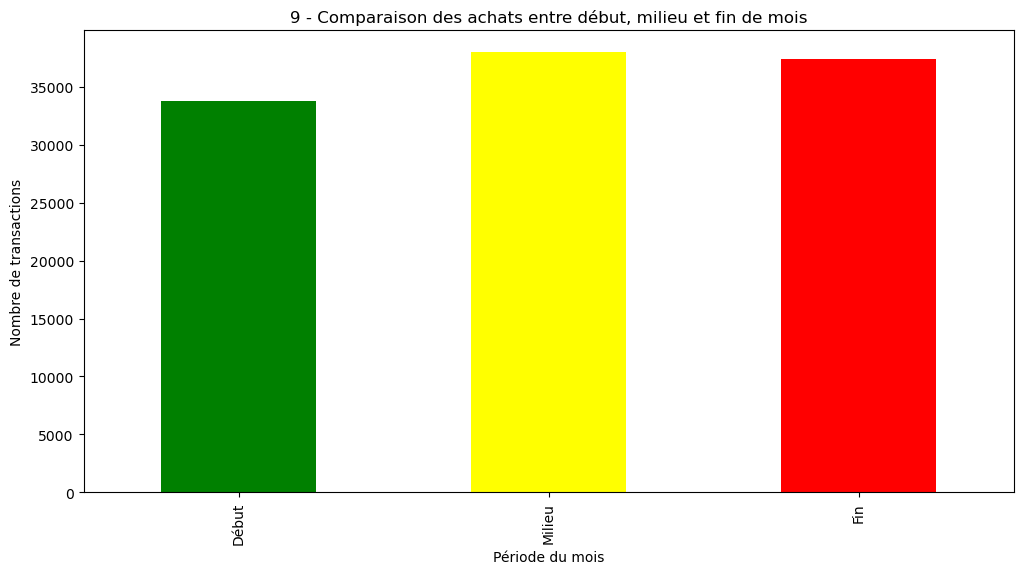

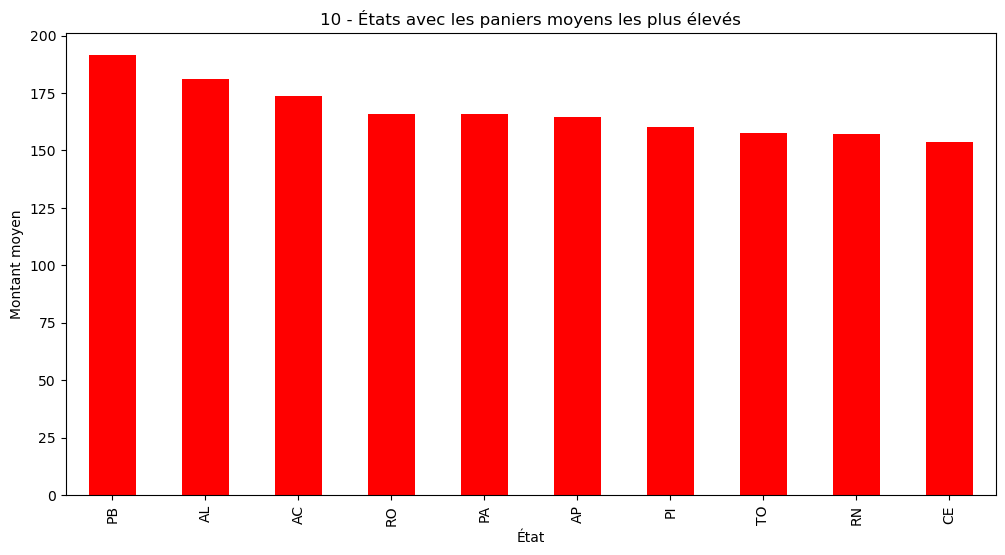

In [2]:
# Convertir les dates
df_achats['purchase_timestamp'] = pd.to_datetime(df_achats['purchase_timestamp'])
df_achats['annee_mois'] = df_achats['purchase_timestamp'].dt.to_period("M")
df_achats['heure'] = df_achats['purchase_timestamp'].dt.hour

# 1️⃣ Courbe d’évolution du volume d’achats par mois
plt.figure(figsize=(12,6))
df_monthly = df_achats.groupby('annee_mois')['order_id'].count()
sns.lineplot(x=df_monthly.index.astype(str), y=df_monthly.values)
plt.title("1 - Évolution du volume d’achats par mois")
plt.xlabel("Mois")
plt.ylabel("Nombre de transactions")
plt.xticks(rotation=45)
plt.savefig(f"{output_dir}1-evolution_volume_achats.png")
plt.show()

# 2️⃣ Répartition des achats par région
plt.figure(figsize=(12,6))
df_regions = df_achats.groupby('cust_state')['order_id'].count().reset_index()
sns.barplot(x='cust_state', y='order_id', data=df_regions, palette='coolwarm')
plt.title("2 - Répartition des achats par région")
plt.xlabel("État")
plt.ylabel("Nombre de transactions")
plt.xticks(rotation=45)
plt.savefig(f"{output_dir}2-transactions_par_etat.png")
plt.show()

# 3️⃣ Distribution du montant moyen des achats par région
plt.figure(figsize=(12,6))
sns.boxplot(x='cust_state', y='price', data=df_achats, palette='coolwarm')
plt.title("3 - Montant moyen des achats par région")
plt.xlabel("État")
plt.ylabel("Montant moyen des commandes")
plt.xticks(rotation=45)
plt.savefig(f"{output_dir}3-montant_moyen_par_etat.png")
plt.show()

# 4️⃣ Histogramme des montants des achats
plt.figure(figsize=(12,6))
sns.histplot(df_achats['price'], bins=50, kde=True, color='blue')
plt.title("4 - Distribution des montants des achats")
plt.xlabel("Montant de la commande")
plt.ylabel("Nombre de transactions")
plt.savefig(f"{output_dir}4-distribution_montants.png")
plt.show()

# 5️⃣ Évolution du panier moyen au fil du temps
plt.figure(figsize=(12,6))
df_avg_price = df_achats.groupby('annee_mois')['price'].mean()
sns.lineplot(x=df_avg_price.index.astype(str), y=df_avg_price.values)
plt.title("5 - Évolution du panier moyen au fil du temps")
plt.xlabel("Mois")
plt.ylabel("Montant moyen")
plt.xticks(rotation=45)
plt.savefig(f"{output_dir}5-evolution_panier_moyen.png")
plt.show()

# 6️⃣ Histogramme du nombre d’articles par commande
plt.figure(figsize=(12,6))
sns.histplot(df_achats['order_item_id'], bins=10, kde=True, color='purple')
plt.title("6 - Distribution du nombre d’articles par commande")
plt.xlabel("Nombre d'articles")
plt.ylabel("Nombre de commandes")
plt.savefig(f"{output_dir}6-distribution_articles_commande.png")
plt.show()

# 7️⃣ Répartition des achats par heure de la journée
plt.figure(figsize=(12,6))
sns.histplot(df_achats['heure'], bins=24, kde=True, color='orange')
plt.title("7 - Répartition des achats par heure de la journée")
plt.xlabel("Heure")
plt.ylabel("Nombre de transactions")
plt.savefig(f"{output_dir}7-achat_par_heure.png")
plt.show()

df_achats['purchase_timestamp'] = pd.to_datetime(df_achats['purchase_timestamp'], errors='coerce')
df_achats['jour_semaine'] = df_achats['purchase_timestamp'].dt.day_name()

# 8️⃣ Courbe d’évolution des achats par jour de la semaine
plt.figure(figsize=(12,6))
sns.countplot(x=df_achats['jour_semaine'], order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title("8 - Évolution des achats par jour de la semaine")
plt.xlabel("Jour de la semaine")
plt.ylabel("Nombre de transactions")
plt.savefig(f"{output_dir}8-achat_par_jour_semaine.png")
plt.show()

# 9️⃣ Comparaison des achats entre début et fin de mois
plt.figure(figsize=(12,6))
df_achats['jour_mois'] = df_achats['purchase_timestamp'].dt.day
df_early_late = df_achats.groupby(pd.cut(df_achats['jour_mois'], bins=[1,10,20,31], labels=["Début", "Milieu", "Fin"]))['order_id'].count()
df_early_late.plot(kind='bar', color=['green', 'yellow', 'red'])
plt.title("9 - Comparaison des achats entre début, milieu et fin de mois")
plt.xlabel("Période du mois")
plt.ylabel("Nombre de transactions")
plt.savefig(f"{output_dir}9-achats_par_periode_mois.png")
plt.show()

# 🔟 États avec les paniers moyens les plus élevés
plt.figure(figsize=(12,6))
df_state_avg = df_achats.groupby('cust_state')['price'].mean().sort_values(ascending=False).head(10)
df_state_avg.plot(kind='bar', color='red')
plt.title("10 - États avec les paniers moyens les plus élevés")
plt.xlabel("État")
plt.ylabel("Montant moyen")
plt.savefig(f"{output_dir}10-etats_paniers_moyens.png")
plt.show()
